In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix ,f1_score,precision_recall_fscore_support,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib as jb
import matplotlib.pyplot as plt
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

In [ ]:
df=pd.read_csv("/content/credit_score.csv")

In [ ]:
df.isnull().any(axis=1).sum()

0

In [ ]:
df['Credit_Score'].value_counts(normalize=True)

Standard    0.530138
Poor        0.291901
Good        0.177961
Name: Credit_Score, dtype: float64

In [ ]:
#Droping Unneaded Columns 
df.drop(['ID','Customer_ID','Name','SSN','Type_of_Loan'],axis=1,inplace=True)

In [ ]:
def drop_outliers(df,field_name):
  iqr=1.5*(np.percentile(df[field_name],75)-np.percentile(df[field_name],25))
  df.drop(df[df[field_name]>(iqr+np.percentile(df[field_name],75))].index,inplace=True)
  df.drop(df[df[field_name]<(np.percentile(df[field_name],25)-iqr)].index,inplace=True)
drop_outliers(df,'Annual_Income')  

In [ ]:
list_of_feature=['Credit_Score','Payment_Behaviour','Payment_of_Min_Amount','Credit_Mix','Occupation']
def encoding(j):
  le=LabelEncoder()
  le.fit(df[j])
  n='New_'+j
  df[n]=le.transform(df[[j]])
  jb.dump(le,n+'.sav')
for i in list_of_feature:
  encoding(i)
df.drop(columns=['Credit_Score','Payment_Behaviour','Payment_of_Min_Amount','Credit_Mix','Occupation'],axis=1,inplace=True)  

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was pas

In [ ]:
df.shape

(98000, 23)

In [ ]:
df.columns = df.columns.astype(str)
df.columns.map(type)
# df.columns.map(type)


Index([<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>],
      dtype='object')

In [ ]:
X = df.drop('New_Credit_Score',axis = 1)
y = df['New_Credit_Score']

In [ ]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [ ]:
jb.dump(sc,'standard scaler.sav')

['standard scaler.sav']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4,shuffle=True)

In [ ]:
rfc = RandomForestClassifier(n_estimators = 75,max_depth=14,min_samples_split=10,random_state=1)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
rfc.fit(X_train, y_train)
  
# performing predictions on the test dataset
y_pred = rfc.predict(X_test)
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))
print("ACCURACY OF THE MODEL: ", rfc.score(X_train, y_train))
print("ACCURACY OF THE MODEL: ", rfc.score(X_test, y_test))

ACCURACY OF THE MODEL:  0.762984693877551
ACCURACY OF THE MODEL:  0.817687074829932
ACCURACY OF THE MODEL:  0.762984693877551


In [ ]:
jb.dump(rfc,'model.sav')

['model.sav']

In [ ]:
print(cross_val_score(rfc,X,y,cv=5,scoring='accuracy'))

[0.70423469 0.70984694 0.71729592 0.70418367 0.71617347]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.76      0.70      6787
           1       0.77      0.73      0.75     11501
           2       0.80      0.78      0.79     20912

    accuracy                           0.76     39200
   macro avg       0.74      0.76      0.75     39200
weighted avg       0.77      0.76      0.76     39200



In [ ]:
print(f1_score(y_test, y_pred, average=None))

[0.80009066 0.83697547 0.8431716 ]


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=15)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Accuracy:",clf.score(X_train, y_train))
print("Accuracy:",clf.score(X_test, y_test))

Accuracy: 0.7263520408163265
Accuracy: 0.8156292517006802
Accuracy: 0.7263520408163265


In [ ]:
knn = KNeighborsClassifier(n_neighbors=10,algorithm='ball_tree',weights='distance')
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
print(accuracy_score(y_test,y_pred))
print("Accuracy:",knn.score(X_train, y_train))

0.740675
Accuracy: 1.0


In [ ]:
from sklearn.svm import SVC
# Building a Support Vector Machine on train data
svc_model = SVC()
svc_model.fit(X_train, y_train)
prediction = svc_model .predict(X_test)
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred =gnb.predict(X_test)
print(gnb.score(X_train, y_train))
print(gnb.score(X_test, y_test))

0.63584
0.63552


In [ ]:
selected_parmeter_svc={'C':[1,2,3,4,5],'kernel':('linear','rbf'),'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}

In [ ]:
grid=GridSearchCV(svc_model,selected_parmeter_svc,refit=True,verbose=2,return_train_score=True)
grid.fit(X_train,y_train)
grid_predictions = grid.predict(X_test)
print('best score ',grid.best_score_)
print('best parmeter ',grid.best_params_)
print(grid.classification_report(y_test,y_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time= 9.1min
[CV] END ........................C=1, gamma=1, kernel=linear; total time= 9.5min
[CV] END ........................C=1, gamma=1, kernel=linear; total time= 8.8min
[CV] END ........................C=1, gamma=1, kernel=linear; total time= 8.1min
[CV] END ........................C=1, gamma=1, kernel=linear; total time= 8.4min
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=18.6min
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=18.9min
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=18.1min
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=17.8min
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=18.4min
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 9.5min
[CV] END ......................C=1, gamma=0.1, 

In [ ]:
%pip install mlxtend --upgrade


In [ ]:
sm = SMOTE(sampling_strategy = 'minority', random_state=0,k_neighbors=20)
nr = NearMiss(sampling_strategy='not minority',n_neighbors=15)
def Inbalance(x,name_of_criteria):
  X_train_new, y_train_new = sm.fit_resample(X_train, y_train)
  rfc1 = RandomForestClassifier(n_estimators = 50,max_depth=15,min_samples_split=10)  
  rfc1.fit(X_train_new, y_train_new)
  y_pred_new = rfc1.predict(X_test)
  print("Test accuracy of ",name_of_criteria, accuracy_score(y_test, y_pred_new))
  print("Trian accuracy of ",name_of_criteria, rfc1.score(X_train_new, y_train_new))
Inbalance(sm,'smote ')
Inbalance(nr,'near_miss ')

Test accuracy of  smote  0.747219387755102
Trian accuracy of  smote  0.8489168186701982
Test accuracy of  near_miss  0.7451020408163266
Trian accuracy of  near_miss  0.8468304140326328


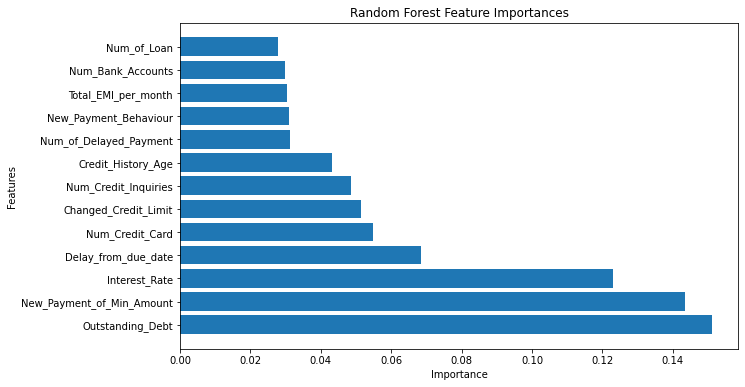

In [ ]:
fs_indices_rfi = np.argsort(rfc.feature_importances_)[::-1][:-9]
best_features_rfi = df.columns[fs_indices_rfi].values

feature_importances_rfi = rfc.feature_importances_[fs_indices_rfi]
feature_importances_rfi

def plot_imp(best_features, scores, method_name): 
    plt.barh(best_features, scores)
    plt.rcParams["figure.figsize"] = (9,6)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest')    

In [ ]:
# Get Bias and Variance - bias_variance_decomp function
rfc1 = RandomForestClassifier()  
from mlxtend.evaluate import bias_variance_decomp
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(estimator=rfc1, X_train, y_train, X_test, y_test,loss='0-1_loss',random_seed=123)
print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

SyntaxError: ignored